In [17]:
from typing import List

import pandas as pd
from openai import OpenAI

from api_key import OPENAI_API_KEY

In [18]:
client = OpenAI(max_retries=5, api_key=OPENAI_API_KEY)
def get_embedding(text: str, model="text-embedding-3-small") -> List[float]:
    return client.embeddings.create(input=[text], model=model).data[0].embedding

In [19]:
words = [
    "king", "queen", "male", "female", "apple"
]

embeddings = [{"word": word, "embedding": get_embedding(word)} for word in words]

In [20]:
df = pd.DataFrame(embeddings)
df.head()

,word,embedding
0,king,"[0.037228088825941086, -0.022083600983023643, ..."
1,queen,"[0.043808333575725555, -0.03978610783815384, 0..."
2,male,"[0.0762191042304039, -0.0034149582497775555, 0..."
3,female,"[0.06657705456018448, -0.021973706781864166, -..."
4,apple,"[0.017625167965888977, -0.016837788745760918, ..."


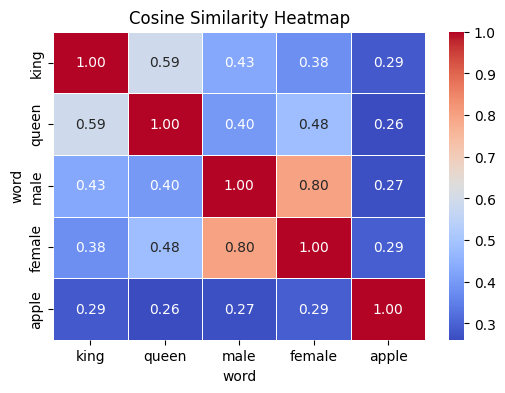

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

embeddings_matrix = np.array(df['embedding'].tolist())
similarity_matrix = cosine_similarity(embeddings_matrix)

similarity_df = pd.DataFrame(similarity_matrix, index=df['word'], columns=df['word'])

plt.figure(figsize=(6, 4))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Cosine Similarity Heatmap')
plt.show()

# TRY VISUALISATION 

https://github.com/openai/openai-cookbook/blob/main/examples/Visualizing_embeddings_in_3D.ipynb

In [ ]:
def get_embeddings(
    list_of_text: List[str], model="text-embedding-3-small"
) -> List[List[float]]:
    # replace newlines, which can negatively affect performance.
    list_of_text = [text.replace("\n", " ") for text in list_of_text]

    data = client.embeddings.create(input=list_of_text, model=model).data
    return [d.embedding for d in data]

In [14]:
samples = pd.DataFrame(data={'word': [ "king", "queen", "male", "female", "apple"], 'category': ["royalty", "royalty", "gender", "gender", "fruit"]})
categories = sorted(samples["category"].unique())

matrix = get_embeddings(samples["word"].to_list())

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
samples["embed_vis"] = vis_dims.tolist()

In [15]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(categories):
    sub_matrix = np.array(samples[samples["category"] == cat]["embed_vis"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.1, 1))

RuntimeError: 'widget is not a recognised GUI loop or backend name